In [9]:
# Import Data Manipulation Libraries

import pandas as pd
import numpy as np\

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries

import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## Step 1:
Import Basic Scikit learn Libraries For Data Manipulation as well as Data Visualization.



## Step 2:
Data Uploading Using Pandas Function

In [10]:
# Load Dataset
url='https://raw.githubusercontent.com/Frisk516/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
133,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,28,67.70
802,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,31.65
426,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,14,29.55
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
813,310.0,0.0,0.0,192.0,0.0,970.0,850.0,180,37.33
...,...,...,...,...,...,...,...,...,...
353,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,100,59.30
739,296.0,0.0,0.0,186.0,0.0,1090.0,769.0,28,25.18
463,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,100,56.06
119,425.0,106.3,0.0,151.4,18.6,936.0,803.7,28,61.80


## Step 3:
Performing Exploratory Data Analysis[EDA]:

1.Univariate Analysis

2.BiVariate Analysis

In [38]:
from collections import OrderedDict
stats=[]

for i in df.columns:
    numerical_stats=OrderedDict({
    'Feature':i,
    'Missing Values': df[i].isnull().sum(),
    'Unique Values': df[i].nunique(),
    'Mean': df[i].mean(),
    'Median': df[i].median(),
    'Min': df[i].min(),
    'Max': df[i].max(),
    'Range': df[i].max() - df[i].min(),
    'Standard Deviation': df[i].std(),
    'Variance': df[i].var(),
    'Skewness': df[i].skew(),
    'Kurtosis': df[i].kurt(),
    'Count': df[i].count(),
    'Percentile 25': df[i].quantile(0.25),
    'Percentile 50': df[i].quantile(0.50),
    'Percentile 75': df[i].quantile(0.75),
    'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
        
})
    stats.append(numerical_stats)

df_stats =pd.DataFrame(stats)

df_stats

           

,Feature,Missing Values,Unique Values,Mean,Median,Min,Max,Range,Standard Deviation,Variance,Skewness,Kurtosis,Count,Percentile 25,Percentile 50,Percentile 75,IQR
0,cement,0,278,281.167864,272.900,102.00,540.0,438.00,104.506364,10921.580220,0.509481,-0.520652,1030,192.375,272.900,350.000,157.625
1,blast_furnace_slag,0,185,73.895825,22.000,0.00,359.4,359.40,86.279342,7444.124812,0.800717,-0.508175,1030,0.000,22.000,142.950,142.950
2,fly_ash,0,156,54.188350,0.000,0.00,200.1,200.10,63.997004,4095.616541,0.537354,-1.328746,1030,0.000,0.000,118.300,118.300
3,water,0,195,181.567282,185.000,121.80,247.0,125.20,21.354219,456.002651,0.074628,0.122082,1030,164.900,185.000,192.000,27.100
4,superplasticizer,0,111,6.204660,6.400,0.00,32.2,32.20,5.973841,35.686781,0.907203,1.411269,1030,0.000,6.400,10.200,10.200
5,coarse_aggregate,0,284,972.918932,968.000,801.00,1145.0,344.00,77.753954,6045.677357,-0.040220,-0.599016,1030,932.000,968.000,1029.400,97.400
6,fine_aggregate,0,302,773.580485,779.500,594.00,992.6,398.60,80.175980,6428.187792,-0.253010,-0.102177,1030,730.950,779.500,824.000,93.050
7,age,0,14,45.662136,28.000,1.00,365.0,364.00,63.169912,3990.437729,3.269177,12.168989,1030,7.000,28.000,56.000,49.000
8,concrete_compressive_strength,0,845,35.817961,34.445,2.33,82.6,80.27,16.705742,279.081814,0.416977,-0.313725,1030,23.710,34.445,46.135,22.425


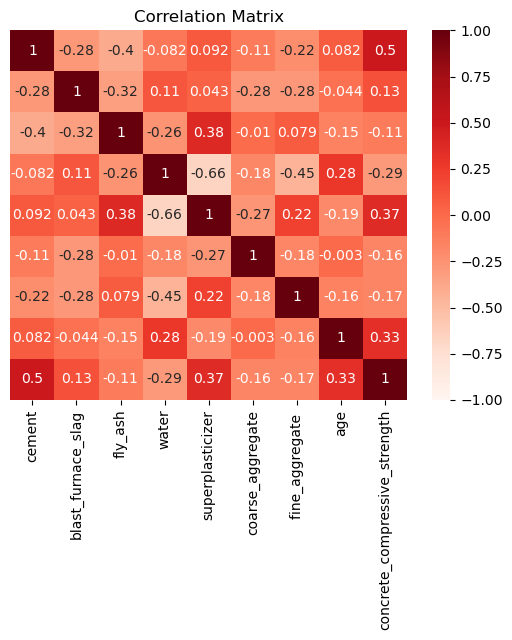

In [41]:
# checking correlation matrix
# X = Independent Variables
# y = Dependent Variable--->['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=False,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlation Matrix')
plt.show()